# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [2]:
from google.colab import drive 
drive.mount('/content/my_drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/my_drive


In [3]:
import os
os.chdir("/content/my_drive/My Drive/")

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from matplotlib import rcParams
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

In [8]:
!unzip -x googleplaystore.zip

Archive:  googleplaystore.zip
  inflating: googleplaystore.csv     


In [9]:
playstore = pd.read_csv("googleplaystore.csv")

In [ ]:
#user_reviews = pd.read_csv("../input/googleplaystore_user_reviews.csv")

In [37]:
playstore.head(15)

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19,"50,000+",Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29,"1,000,000+",Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33,"1,000,000+",Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [11]:
playstore.drop_duplicates(subset = ['App'],keep='first',inplace=True)

In [12]:
playstore.reset_index(inplace=True)

In [13]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9660 non-null   int64  
 1   App             9660 non-null   object 
 2   Category        9660 non-null   object 
 3   Rating          8197 non-null   float64
 4   Reviews         9660 non-null   object 
 5   Size            9660 non-null   object 
 6   Installs        9660 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9660 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9660 non-null   object 
 11  Last Updated    9660 non-null   object 
 12  Current Ver     9652 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [14]:
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [15]:
playstore = playstore[playstore['Price']!= 'Everyone'].reset_index()

In [16]:
for i in range(0,len(playstore['Price'])):
    if '$' in playstore.loc[i,'Price']:
        playstore.loc[i,'Price'] = playstore.loc[i,'Price'][1:]
    playstore.loc[i,'Price'] =  float(playstore.loc[i,'Price'])

In [17]:
playstore['Price'].unique()

array([0.0, 4.99, 3.99, 6.99, 1.49, 2.99, 7.99, 5.99, 3.49, 1.99, 9.99,
       7.49, 0.99, 9.0, 5.49, 10.0, 24.99, 11.99, 79.99, 16.99, 14.99,
       1.0, 29.99, 12.99, 2.49, 10.99, 1.5, 19.99, 15.99, 33.99, 74.99,
       39.99, 3.95, 4.49, 1.7, 8.99, 2.0, 3.88, 25.99, 399.99, 17.99,
       400.0, 3.02, 1.76, 4.84, 4.77, 1.61, 2.5, 1.59, 6.49, 1.29, 5.0,
       13.99, 299.99, 379.99, 37.99, 18.99, 389.99, 19.9, 8.49, 1.75,
       14.0, 4.85, 46.99, 109.99, 154.99, 3.08, 2.59, 4.8, 1.96, 19.4,
       3.9, 4.59, 15.46, 3.04, 4.29, 2.6, 3.28, 4.6, 28.99, 2.95, 2.9,
       1.97, 200.0, 89.99, 2.56, 30.99, 3.61, 394.99, 1.26, 1.2, 1.04],
      dtype=object)

In [18]:
playstore.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
playstore['Reviews'] = playstore['Reviews'].astype('float')

In [20]:
playstore['Price'] = playstore['Price'].astype('float')

In [21]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         9659 non-null   int64  
 1   index           9659 non-null   int64  
 2   App             9659 non-null   object 
 3   Category        9659 non-null   object 
 4   Rating          8196 non-null   float64
 5   Reviews         9659 non-null   float64
 6   Size            9659 non-null   object 
 7   Installs        9659 non-null   object 
 8   Type            9658 non-null   object 
 9   Price           9659 non-null   float64
 10  Content Rating  9659 non-null   object 
 11  Genres          9659 non-null   object 
 12  Last Updated    9659 non-null   object 
 13  Current Ver     9651 non-null   object 
 14  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [22]:
playstore.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
playstore["Rating"] = playstore.groupby("Category")['Rating'].transform(lambda x: x.fillna(x.mean()))

In [24]:
playstore.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Count by Categories')

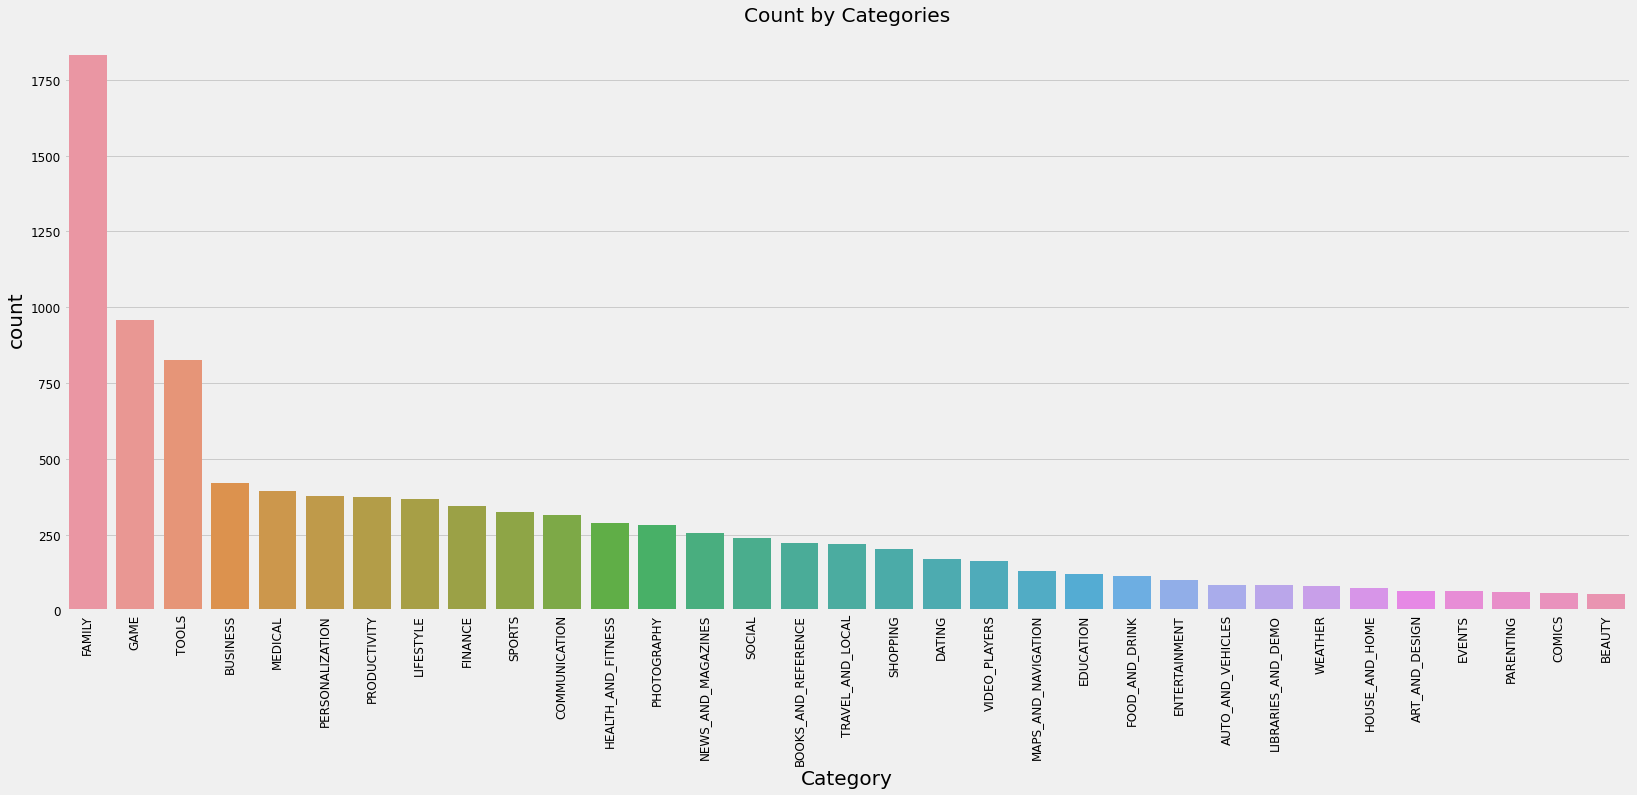

In [25]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot("Category", data=playstore,ax=ax1,order=playstore['Category'].value_counts().index)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
f.set_size_inches(25,10)
ax1.set_title("Count by Categories")

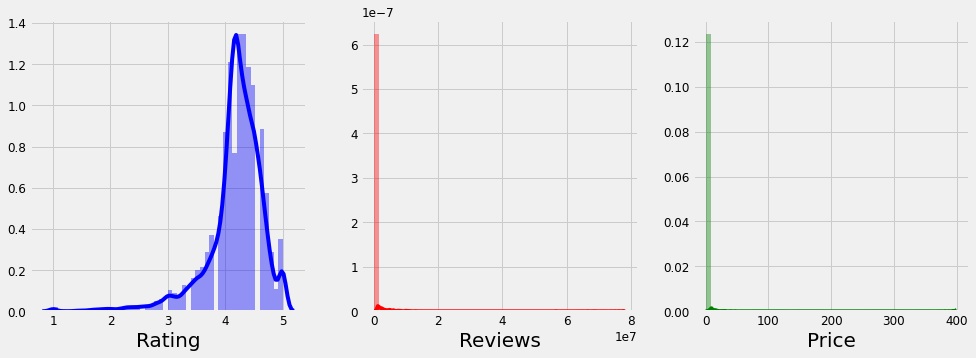

In [26]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.distplot(playstore['Rating'],hist=True,color='b',ax=ax1)
sns.distplot(playstore['Reviews'],hist=True,color='r',ax=ax2)
sns.distplot(playstore['Price'],hist=True,color='g',ax=ax3)
f.set_size_inches(15, 5)

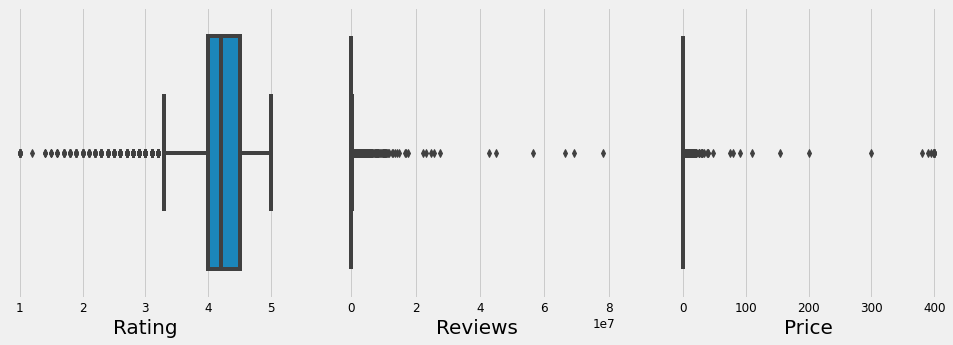

In [27]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=playstore,ax=ax1)
sns.boxplot(x='Reviews',data=playstore,ax=ax2)
sns.boxplot(x='Price',data=playstore,ax=ax3)
f.set_size_inches(15, 5)

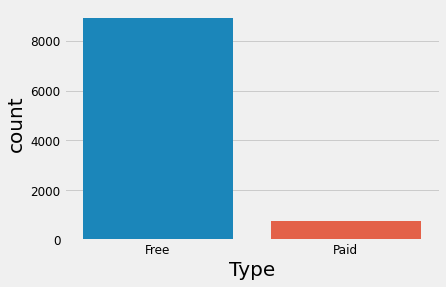

In [28]:
sns.countplot(x='Type',data=playstore)

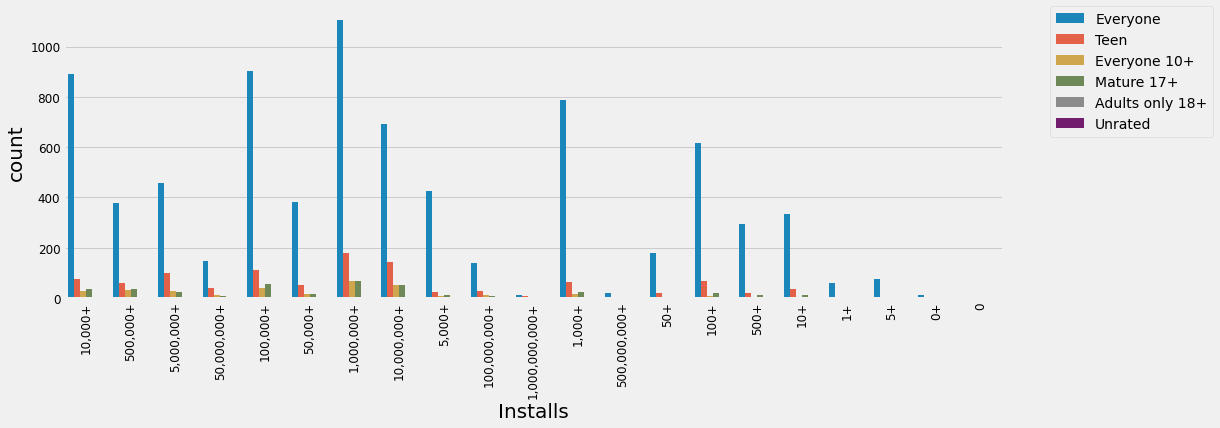

In [29]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot(x = 'Installs',hue='Content Rating',data=playstore,ax=ax1)
plt.xticks(rotation=90)
f.set_size_inches(15,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

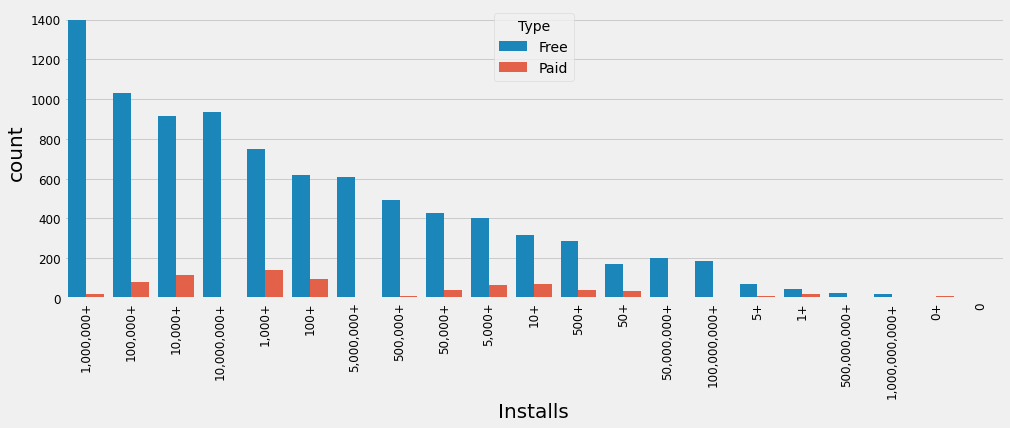

In [30]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot(x = 'Installs',hue='Type',data=playstore,ax=ax1,order=playstore['Installs'].value_counts().index)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

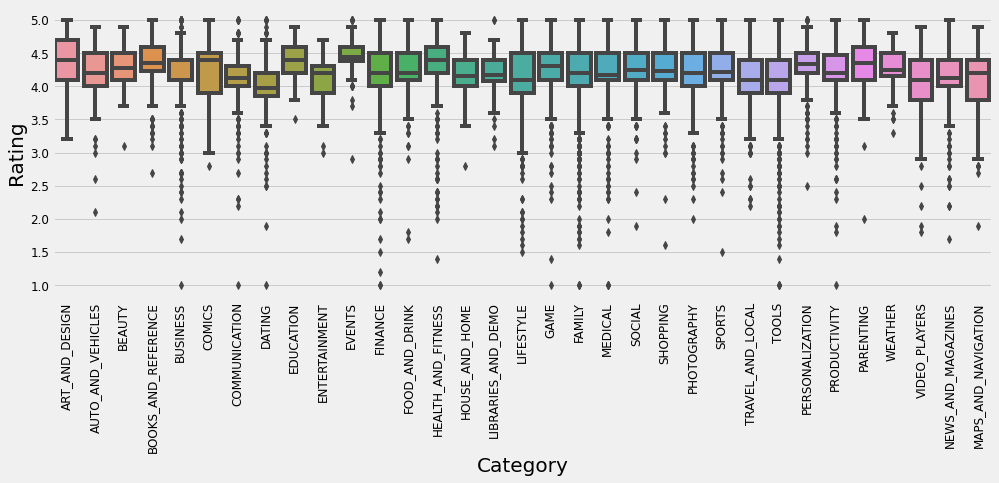

In [31]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=playstore)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

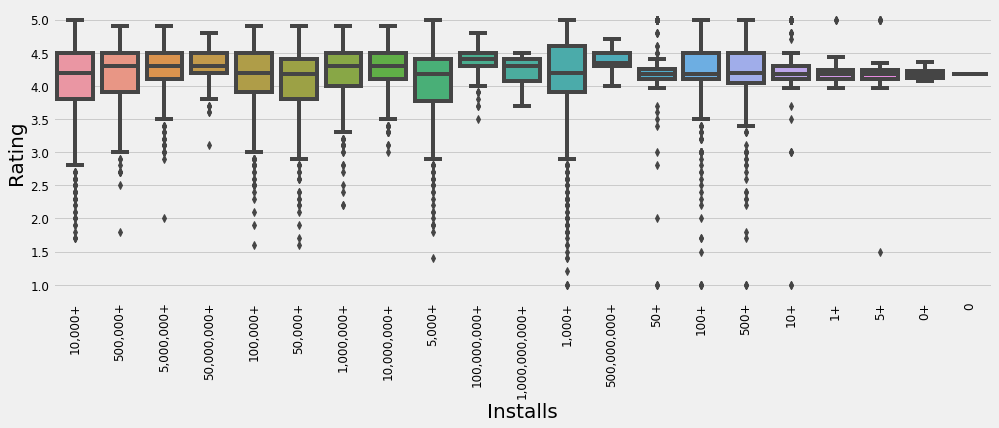

In [32]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=playstore)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

In [33]:
playstore.head()

,level_0,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


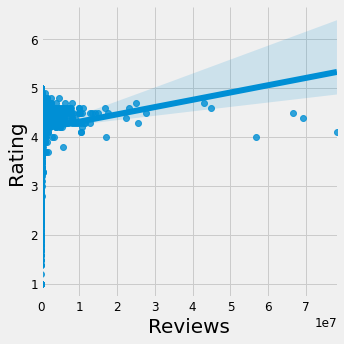

In [34]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=playstore)